# WELCOME TO MY NOTEBOOK

## MAIN OBJECTIVE

  This Notebook will be More focused on Predicting the Classification of the target Variable in the
  Dataset Selected (that is explained below) so "Objective is to Predict" in the  Conclusion of this analysis will give Best possible prediction and with that try to explain the Features.

### Dataset Description

This Dataset is about the Students Knowledge Level with explainable columns. This is beginner level data set has 403 rows and 6 columns. It is a real dataset about the students' knowledge status about the subject of Electrical DC Machines.

##### Attributes
STG - The degree of study time for goal object materials
SCG - The degree of repetition number of user for goal object materials
STR - The degree of study time of user for related objects with goal object
LPR - The exam performance of user for related objects with goal object
PEG - The exam performance of user for goal objects
UNS - The knowledge level of user (Very Low, Low, Middle, High)

UNS is the Target variable we try to predict. It has four classes namely Very Low, Low, Middle, High.


##### Dataset source
This data set has been sourced from the Machine Learning Repository of University of California, Irvine User Knowledge Modeling Data Set (UC Irvine).

# Data Exploration

In [2]:
# Importing Lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### @Loading Data from Disk to Notebook

In [3]:
data=pd.read_csv('Predict_student_ knowledge_level.csv')
data # Data overview

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,NaN
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,NaN
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,NaN
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,NaN
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High,NaN,NaN,NaN
399,0.85,0.82,0.66,0.83,0.83,High,NaN,NaN,NaN
400,0.56,0.60,0.77,0.13,0.32,Low,NaN,NaN,NaN
401,0.66,0.68,0.81,0.57,0.57,Middle,NaN,NaN,NaN


In [4]:
data.shape #data shape(rows,columns)

(403, 9)

##### Removing that empty cloumns

In [5]:
data=data.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1)
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


##### General Info about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [7]:
data.STG.unique()

array([0.   , 0.08 , 0.06 , 0.1  , 0.09 , 0.15 , 0.2  , 0.18 , 0.12 ,
       0.05 , 0.04 , 0.19 , 0.02 , 0.14 , 0.115, 0.17 , 0.13 , 0.23 ,
       0.24 , 0.25 , 0.32 , 0.29 , 0.28 , 0.3  , 0.27 , 0.31 , 0.255,
       0.265, 0.275, 0.245, 0.295, 0.315, 0.248, 0.325, 0.258, 0.251,
       0.288, 0.323, 0.243, 0.299, 0.26 , 0.305, 0.276, 0.329, 0.285,
       0.312, 0.39 , 0.4  , 0.45 , 0.48 , 0.41 , 0.38 , 0.37 , 0.33 ,
       0.42 , 0.44 , 0.46 , 0.365, 0.345, 0.49 , 0.334, 0.36 , 0.43 ,
       0.495, 0.465, 0.475, 0.348, 0.385, 0.445, 0.34 , 0.35 , 0.6  ,
       0.55 , 0.68 , 0.73 , 0.78 , 0.59 , 0.64 , 0.69 , 0.62 , 0.7  ,
       0.75 , 0.85 , 0.8  , 0.9  , 0.76 , 0.72 , 0.52 , 0.51 , 0.58 ,
       0.61 , 0.77 , 0.79 , 0.71 , 0.88 , 0.99 , 0.83 , 0.66 , 0.523,
       0.5  , 0.91 , 0.89 , 0.56 , 0.54 , 0.22 , 0.16 , 0.11 , 0.21 ,
       0.47 , 0.65 , 0.87 , 0.57 ])

In [8]:
data['UNS']=data[' UNS']
data=data.drop([' UNS'],axis=1)

Description

In [9]:
data.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [10]:
data.UNS.unique()

array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

##### There is same type of class with different name
    making it correct.

In [11]:
data.UNS = [each.lower().replace("very low","very_low") for each in data.UNS]
data.UNS.value_counts()

low         129
middle      122
high        102
very_low     50
Name: UNS, dtype: int64

In [12]:
data['UNS'].unique()

array(['very_low', 'high', 'low', 'middle'], dtype=object)

Now looks good.

##### Checking for null Values

In [13]:
data.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

No null values.

##### Checking the Data type in each columns.

In [14]:
data.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
UNS     object
dtype: object

##### The data is Scaled. we can see below.

In [15]:
pd.concat([data.min(),data.max()],axis=1)

,0,1
STG,0.0,0.99
SCG,0.0,0.9
STR,0.0,0.95
LPR,0.0,0.99
PEG,0.0,0.99
UNS,high,very_low


##### This data has nothing to clean and fill.

#### Now plotting each Attributes to check the distribution.

<AxesSubplot:xlabel='PEG', ylabel='Count'>

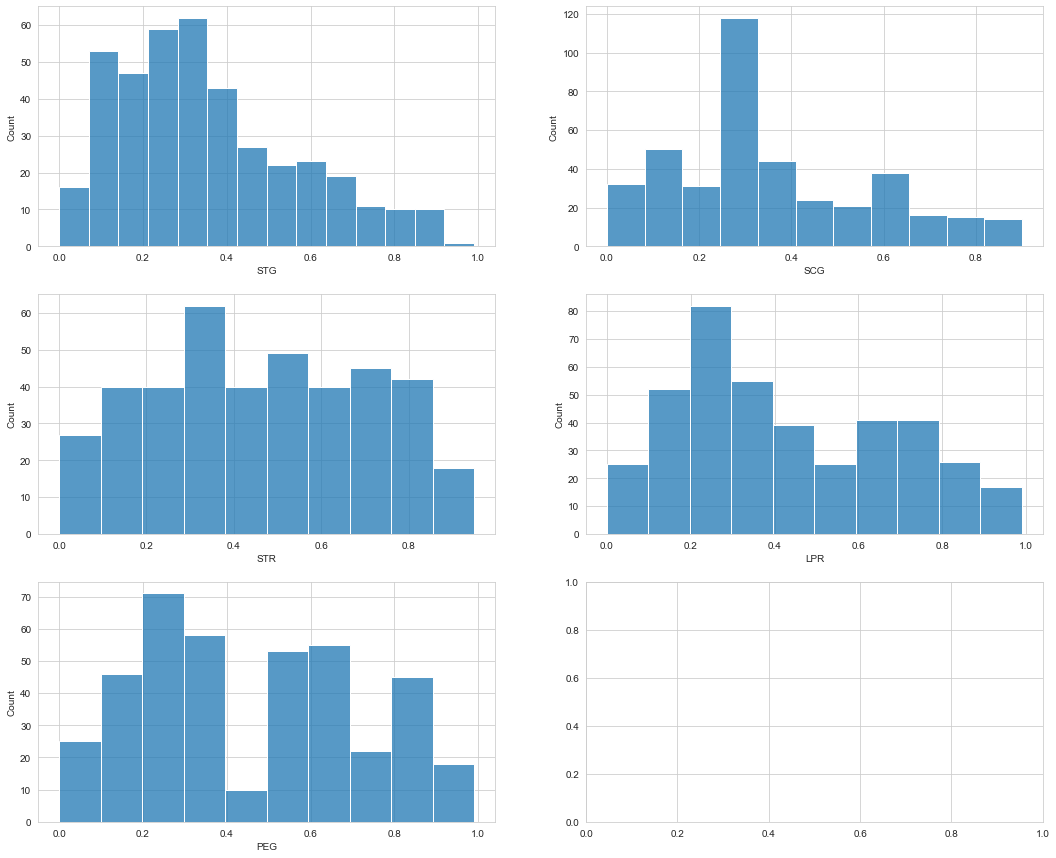

In [16]:
fig,axes=plt.subplots(3,2, figsize=(18,15))
sns.histplot(ax=axes[0,0],x=data.STG)
sns.histplot(ax=axes[0,1],x=data.SCG)
sns.histplot(ax=axes[1,0],x=data.STR)
sns.histplot(ax=axes[1,1],x=data.LPR)
sns.histplot(ax=axes[2,0],x=data.PEG)


#### Target Variable

<AxesSubplot:xlabel='UNS', ylabel='Count'>

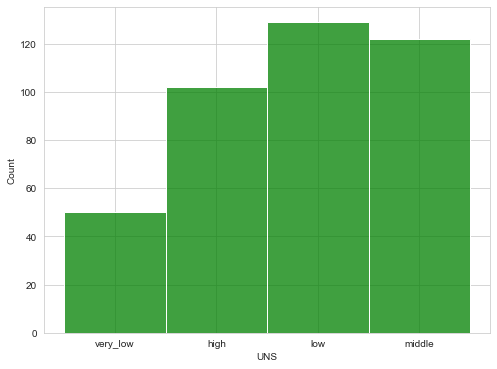

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=data['UNS'],color='green')

##### Scatter plot of study time with respect to exam performance.

<AxesSubplot:xlabel='STG', ylabel='PEG'>

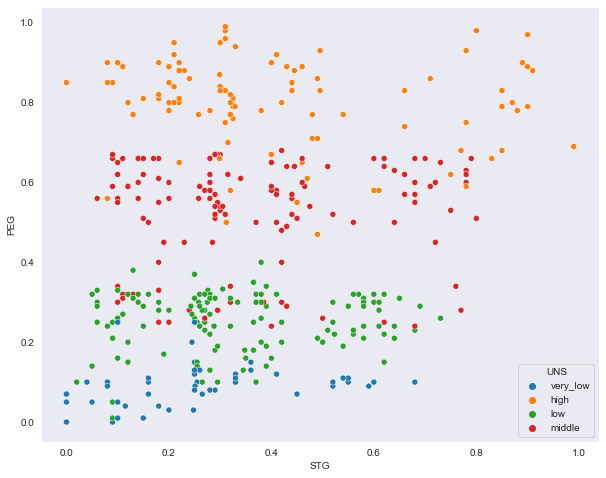

In [18]:
pp=plt.figure(figsize=(10,8))
sns.set_style('dark')
sns.scatterplot(data=data,x=data.STG,y=data.PEG,hue='UNS')

##### Correlation of study time with respect to exam performance.

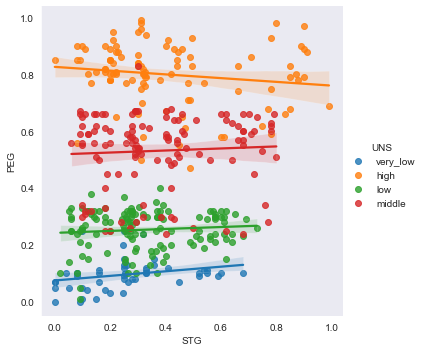

In [19]:
sns.lmplot(data=data,x='STG',y='PEG',hue='UNS')

<AxesSubplot:xlabel='UNS', ylabel='STG'>

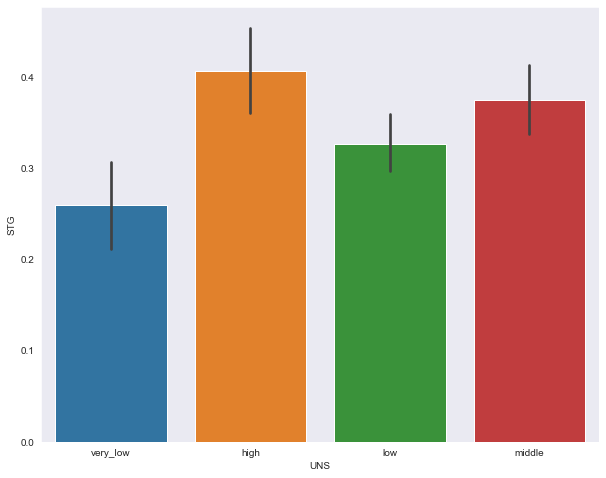

In [20]:
pp=plt.figure(figsize=(10,8))
sns.set_style('dark')
sns.barplot(x=data.UNS,y=data.STG) #study time of user for related objects with goal object

##### Scatter plot of repetition number of user for goal object with respect to exam performance.

<AxesSubplot:xlabel='PEG', ylabel='SCG'>

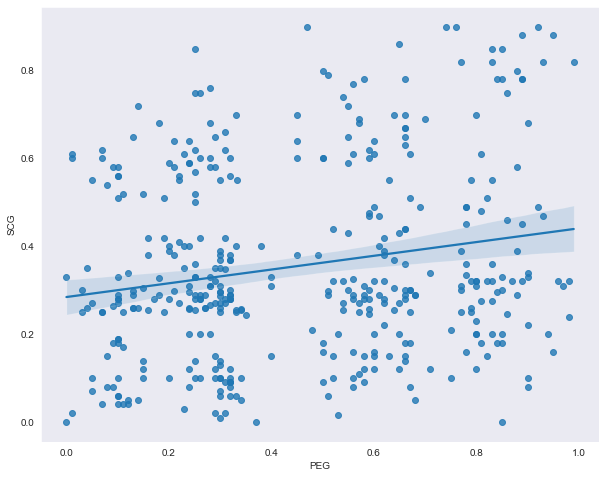

In [21]:
plt.figure(figsize=(10,8))
sns.regplot(x=data.PEG,y=data.SCG)

#### *Relation beteen knowledge level of user vs exam performance of use
#### *Relation beteen knowledge level of user vs exam performance of user for related objects

<AxesSubplot:xlabel='UNS', ylabel='LPR'>

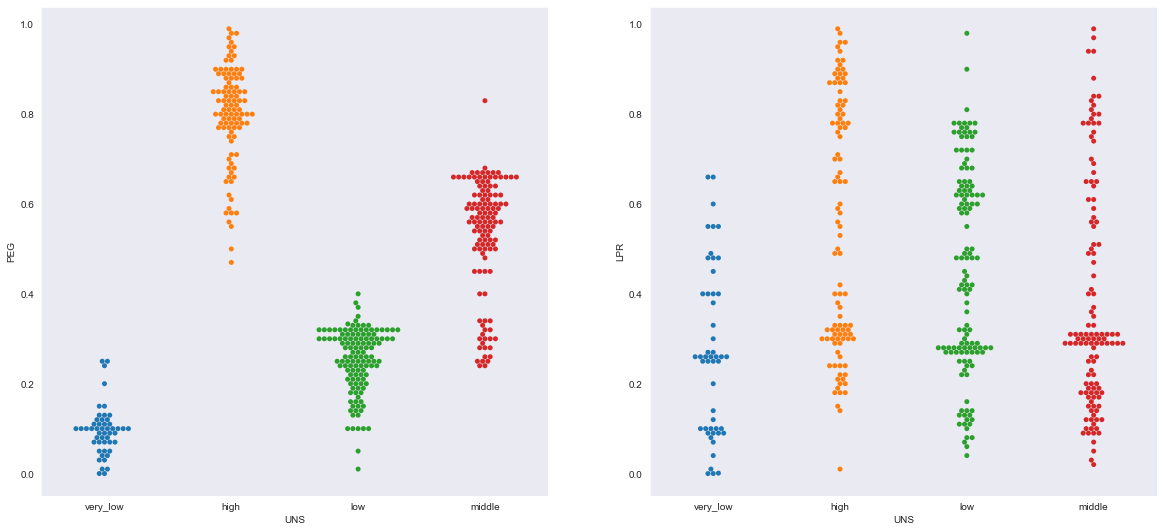

In [22]:

fig,axes =plt.subplots(1,2,figsize=(20,9))
sns.swarmplot(ax=axes[0],x=data.UNS,y=data.PEG)
sns.swarmplot(ax=axes[1],x=data.UNS,y=data.LPR)

##### checking for outliers using Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x21354b08c70>,
 'caps': [<matplotlib.lines.Line2D at 0x21354b17250>,
 'boxes': [<matplotlib.lines.Line2D at 0x21354b08970>,
 'medians': [<matplotlib.lines.Line2D at 0x21354b177f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21354b17d90>,
 'means': [<matplotlib.lines.Line2D at 0x21354b17ac0>,
  <matplotlib.lines.Line2D at 0x21354b64640>]}

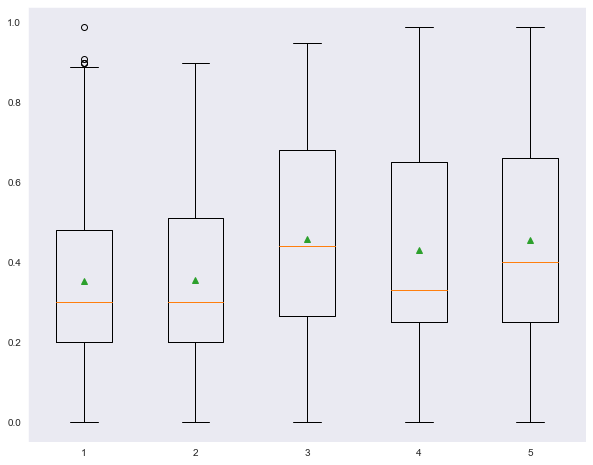

In [23]:
plt.figure(figsize=(10,8))
plt.boxplot(data.iloc[:,:-1],showmeans=True)

Doesn't seems to big deal.

## MODE BUILDING & TRAINING.

#### Importing necessary lib's.

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,ShuffleSplit,StratifiedKFold,StratifiedShuffleSplit,GridSearchCV,learning_curve
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,precision_recall_curve,classification_report,precision_score,f1_score,confusion_matrix,recall_score,plot_roc_curve

##### segregation the X and Y columns.

In [25]:
x=data.iloc[:,:-1]
Y=data.iloc[:,-1:]

In [26]:
Y.head()

,UNS
0,very_low
1,high
2,low
3,middle
4,low


##### Encoding the target variable.

In [27]:
le=LabelEncoder()
y=le.fit_transform(Y.values.ravel())
c=le.inverse_transform(y)

In [28]:
c[1:6]

array(['high', 'low', 'middle', 'low', 'middle'], dtype=object)

##### Train test split with stratification.

In [29]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

#### The stratified split of y is below with equally splitted.

<AxesSubplot:ylabel='Count'>

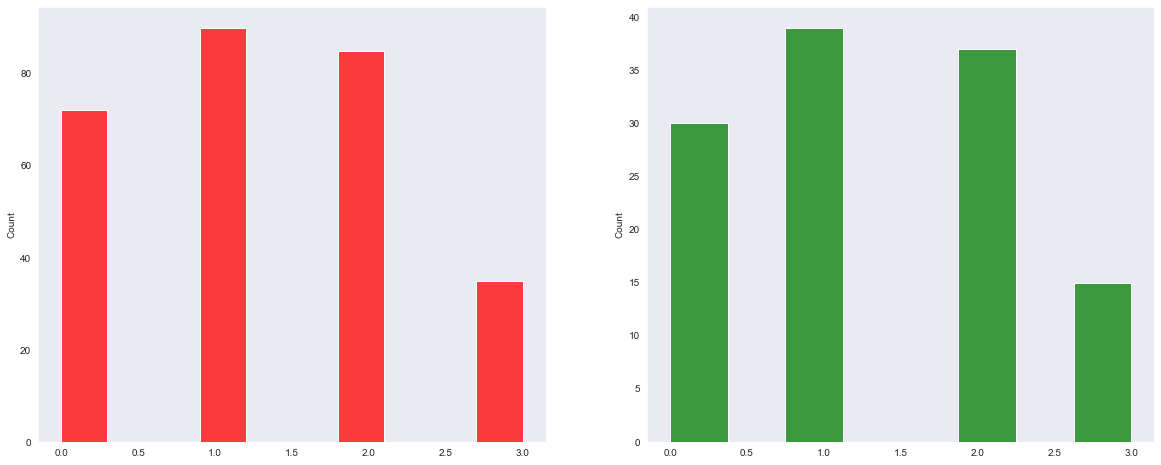

In [30]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.histplot(ax=axes[0],x=y_train,color='red')
sns.histplot(ax=axes[1],x=y_test,color='green')

In [31]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(282, 5) (282,)
(121, 5) (121,)


# Model Building --

## Fitting Logistic Regression Model.

In [32]:
lo=LogisticRegression()
lo.fit(x_train,y_train)
ypredlo=lo.predict(x_test)

#### Getting Accuracy score, Precision, Recall, F1 Score

In [37]:
precision,recall,f1score,support=precision_recall_fscore_support(y_test,ypredlo)
all={'acuracy':accuracy_score(y_test,ypredlo),'precision':precision,'recal':recall,'f1score':f1score}

In [38]:
all

{'acuracy': 0.8429752066115702,
 'precision': array([1.        , 0.67857143, 1.        , 0.83333333]),
 'recal': array([1.        , 0.97435897, 0.78378378, 0.33333333]),
 'f1score': array([1.        , 0.8       , 0.87878788, 0.47619048])}

#### Defining function for getting All the Scores.

In [41]:
def scores(yt,yp):
    acuracy=accuracy_score(yt,yp)
    precision,recall,f1score,support=precision_recall_fscore_support(yt,yp)
    sc={'acuracy':acuracy,'precision':precision,'recall':recall,'f1score':f1score}
    return  pd.DataFrame(sc).set_index(keys=np.array(['verylow','high','middle','low']))

In [42]:
scores(y_test,ypredlo)

,acuracy,precision,recall,f1score
verylow,0.842975,1.000000,1.000000,1.000000
high,0.842975,0.678571,0.974359,0.800000
middle,0.842975,1.000000,0.783784,0.878788
low,0.842975,0.833333,0.333333,0.476190


In [43]:
lo.coef_

array([[ 0.20489559,  0.84782216,  0.64348579,  2.31302463,  6.34364977],
       [ 0.02740854, -0.37122048, -0.21419144, -0.00848867, -3.14867644],
       [ 0.83710923,  0.19982656,  0.42504269, -0.18131524,  1.64860852],
       [-1.06941336, -0.67642825, -0.85433704, -2.12322071, -4.84358185]])

##### Creating confusion matrix for the Logistic Regression.

<AxesSubplot:>

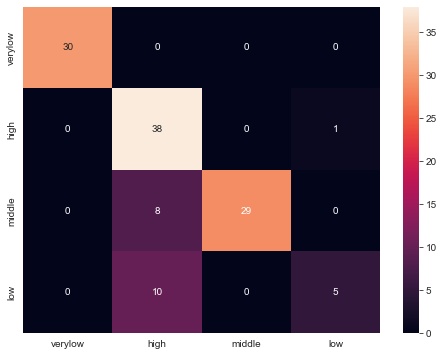

In [44]:
cflo=confusion_matrix(y_test,ypredlo)
plt.figure(figsize=(8,6))
sns.heatmap(cflo,annot=True,xticklabels=['verylow','high','middle','low'],yticklabels=['verylow','high','middle','low'])

#### Logistic Regression with custom values.

In [45]:
l2_model = LogisticRegression(random_state=42, penalty='l2', multi_class='multinomial', solver='lbfgs',max_iter=10000)
l2_model.fit(x_train,y_train)
ypredl2=l2_model.predict(x_test)
ypredl2t=l2_model.predict(x_train)

#### Test Set Score.

In [46]:
print('TEST SCORES:')
scores(y_test,ypredl2)

TEST SCORES:


,acuracy,precision,recall,f1score
verylow,0.842975,1.000000,1.000000,1.000000
high,0.842975,0.678571,0.974359,0.800000
middle,0.842975,1.000000,0.783784,0.878788
low,0.842975,0.833333,0.333333,0.476190


#### Above Looks same as Logistic Regression with Default values.

### Train set Score.

In [47]:
print('TRAIN SCORES:')
scores(y_train,ypredl2t)

TRAIN SCORES:


,acuracy,precision,recall,f1score
verylow,0.826241,0.946667,0.986111,0.965986
high,0.826241,0.674242,0.988889,0.801802
middle,0.826241,0.970149,0.764706,0.855263
low,0.826241,1.000000,0.228571,0.372093


#### For this model class LOW is not getting much Recall score.

In [52]:
l2_model.coef_

array([[ 0.20489559,  0.84782216,  0.64348579,  2.31302463,  6.34364977],
       [ 0.02740854, -0.37122048, -0.21419144, -0.00848867, -3.14867644],
       [ 0.83710923,  0.19982656,  0.42504269, -0.18131524,  1.64860852],
       [-1.06941336, -0.67642825, -0.85433704, -2.12322071, -4.84358185]])

### Creating Confusion Matrix for both Train and Test set.

<AxesSubplot:>

<Figure size 576x432 with 0 Axes>

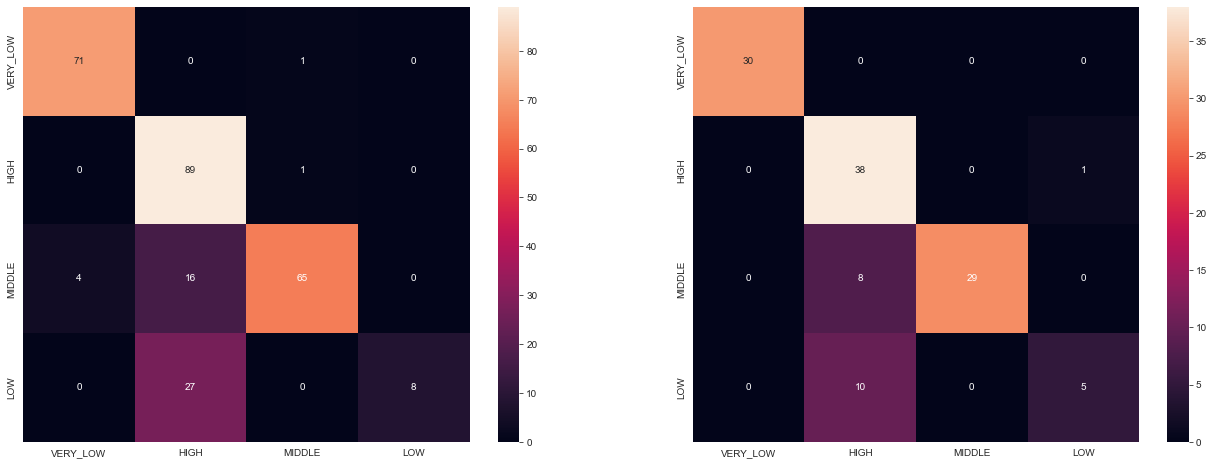

In [117]:
cfl2=confusion_matrix(y_test,ypredl2)
cfl2t=confusion_matrix(y_train,ypredl2t)

plt.figure(figsize=(8,6))
fig,axes=plt.subplots(1,2,figsize=(22,8))
sns.heatmap(ax=axes[0],data=cfl2t,annot=True,xticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'],yticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'])
sns.heatmap(ax=axes[1],data=cfl2,annot=True,xticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'],yticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'])

## Logistic Rgression with L1 penalty.

In [54]:
l1_model = LogisticRegression(random_state=42, penalty='l1', multi_class='multinomial', solver='saga',max_iter=10000)
l1_model.fit(x_train,y_train)
ypredl1=l1_model.predict(x_test)
ypredl1t=l1_model.predict(x_train)

In [55]:
print('TEST SCORES:')
scores(y_test,ypredl1)

TEST SCORES:


,acuracy,precision,recall,f1score
verylow,0.92562,1.0000,1.000000,1.000000
high,0.92562,0.8125,1.000000,0.896552
middle,0.92562,1.0000,0.837838,0.911765
low,0.92562,1.0000,0.800000,0.888889


In [56]:
print('TRAIN SCORES:')
scores(y_train,ypredl1t)

TRAIN SCORES:


,acuracy,precision,recall,f1score
verylow,0.925532,0.985915,0.972222,0.979021
high,0.925532,0.839623,0.988889,0.908163
middle,0.925532,0.973684,0.870588,0.919255
low,0.925532,0.965517,0.800000,0.875000


#### Model with L1 penalty seems to giving better results.

In [57]:
l1_model.score(x_train,y_train),l1_model.score(x_test,y_test)

(0.925531914893617, 0.9256198347107438)

In [58]:
l1_model.coef_

array([[  0.        ,   0.        ,   0.        ,   7.30776828,
         22.80753956],
       [  0.        ,   0.        ,   0.        ,  -1.53841778,
         -6.82349608],
       [  0.29876925,   0.        ,   0.06083014,   1.13679844,
          6.22333495],
       [  0.        ,   0.        ,  -0.45493062,  -6.30773541,
        -22.2114645 ]])

<AxesSubplot:>

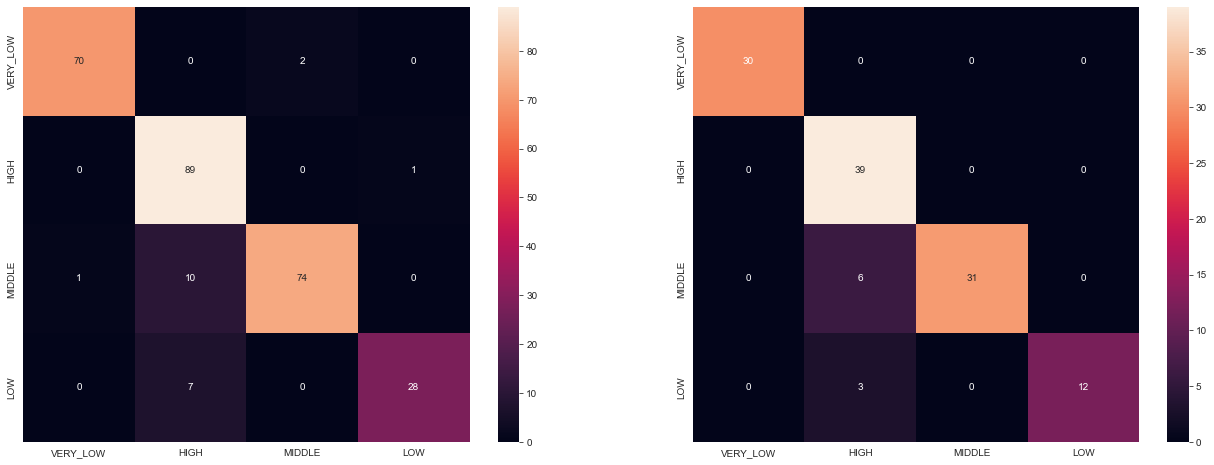

In [116]:
cfl1=confusion_matrix(y_test,ypredl1)
cfl1t=confusion_matrix(y_train,ypredl1t)
fig,axes=plt.subplots(1,2,figsize=(22,8))
#plt.figure(figsize=(8,6))
sns.heatmap(ax=axes[0],data=cfl1t,annot=True,xticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'],yticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'])
sns.heatmap(ax=axes[1],data=cfl1,annot=True,xticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'],yticklabels=['VERY_LOW','HIGH','MIDDLE','LOW'])

## Importing Flaml lib.

In [61]:
import flaml as fl

In [62]:
from flaml import AutoML

### Using AutoML for getting better score.

In [64]:
automl=AutoML()
automl.fit(x_train,y_train,task='classification')
ypredml=automl.predict(x_test)
ypredmlt=automl.predict(x_train)

[flaml.automl: 07-21 20:09:27] {2390} INFO - task = classification
[flaml.automl: 07-21 20:09:27] {2392} INFO - Data split method: stratified
[flaml.automl: 07-21 20:09:27] {2396} INFO - Evaluation method: holdout
[flaml.automl: 07-21 20:09:27] {2465} INFO - Minimizing error metric: log_loss
[flaml.automl: 07-21 20:09:27] {2513} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 07-21 20:09:27] {2605} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 07-21 20:09:27] {2897} INFO - iteration 0, current learner rf
[flaml.automl: 07-21 20:09:28] {3025} INFO - Estimated sufficient time budget=10983s. Estimated necessary time budget=127s.
[flaml.automl: 07-21 20:09:28] {3072} INFO -  at 1.1s,	estimator rf's best error=1.2330,	best estimator rf's best

In [65]:
scores(y_test,ypredml)

,acuracy,precision,recall,f1score
verylow,0.975207,1.000000,1.000000,1.000000
high,0.975207,0.928571,1.000000,0.962963
middle,0.975207,1.000000,0.918919,0.957746
low,0.975207,1.000000,1.000000,1.000000


In [66]:
scores(y_train,ypredmlt)

,acuracy,precision,recall,f1score
verylow,1.0,1.0,1.0,1.0
high,1.0,1.0,1.0,1.0
middle,1.0,1.0,1.0,1.0
low,1.0,1.0,1.0,1.0


##### Likewise this gives much better scores.

In [67]:
automl.score(x_train,y_train),automl.score(x_test,y_test)

(1.0, 0.9752066115702479)

In [68]:
automl.best_result

{'pred_time': 0.02319636195898056,
 'wall_clock_time': 11.55249547958374,
 'metric_for_logging': {'pred_time': 0.02319636195898056},
 'val_loss': 0.3018192903929744,
 'training_iteration': 1,
 'config': {'n_estimators': 2047,
  'max_features': 1.0,
  'max_leaves': 18344,
  'criterion': 'entropy'},
 'config/n_estimators': 2047,
 'config/max_features': 1.0,
 'config/max_leaves': 18344,
 'config/criterion': 'entropy',
 'experiment_tag': 'exp',
 'time_total_s': 3.005923271179199}

##### All models with its loss.

In [86]:
automl.best_loss_per_estimator

{'rf': 1.2329927782380166,
 'lgbm': 0.6005965633922834,
 'xgboost': 0.3911803248702199,
 'extra_tree': 0.3018192903929744,
 'xgb_limitdepth': 0.39102573465788737,
 'lrl1': 1.1905604675716568}

#### Creating Confusion matrix for both train and test sets.

<AxesSubplot:>

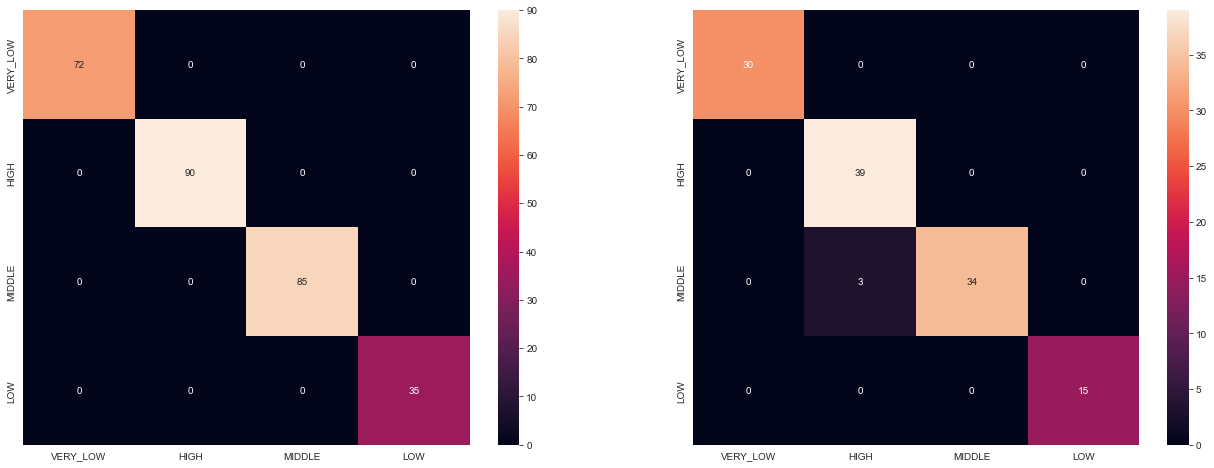

In [115]:
cfml = confusion_matrix(y_test, ypredml)
cfmlt = confusion_matrix(y_train, ypredmlt)
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
#plt.figure(figsize=(8,6))
sns.heatmap(ax=axes[0], data=cfmlt, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=cfml, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

## knn model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn=KNeighborsClassifier(n_neighbors=10,weights='distance')
knn.fit(x_train,y_train)
ypredknn=knn.predict(x_test)
ypredknnt=knn.predict(x_train)

In [92]:
accuracy_score(y_test,ypredknn)

0.9008264462809917

In [93]:
f1_score(y_test,ypredknn,average=None)   #[None, 'micro', 'macro', 'weighted'].

array([0.98305085, 0.87356322, 0.90140845, 0.8       ])

In [94]:
precision_recall_fscore_support(y_test,ypredknn)

(array([1.        , 0.79166667, 0.94117647, 1.        ]),
 array([0.96666667, 0.97435897, 0.86486486, 0.66666667]),
 array([0.98305085, 0.87356322, 0.90140845, 0.8       ]),
 array([30, 39, 37, 15], dtype=int64))

In [95]:
scores(y_train,ypredknnt)

,acuracy,precision,recall,f1score
verylow,1.0,1.0,1.0,1.0
high,1.0,1.0,1.0,1.0
middle,1.0,1.0,1.0,1.0
low,1.0,1.0,1.0,1.0


In [96]:
scores(y_test,ypredknn)

,acuracy,precision,recall,f1score
verylow,0.900826,1.000000,0.966667,0.983051
high,0.900826,0.791667,0.974359,0.873563
middle,0.900826,0.941176,0.864865,0.901408
low,0.900826,1.000000,0.666667,0.800000


#### To find best n neighbors

In [97]:
max_no=40
error_rate=[]
f1scores=[]
for i in range(1,max_no):
    knn1=KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn1.fit(x_train,y_train)
    ypr=knn1.predict(x_test)
    precision,recall,f1score,support=precision_recall_fscore_support(y_test,ypr,average=None)
    error=1-round(accuracy_score(y_test,ypr),2)
    error_rate.append((i,error))
    f1scores.append((i,f1score))
f1sc=pd.DataFrame(f1scores,columns=['k','f1score'])
errorrate=pd.DataFrame(error_rate,columns=['k','error'])

In [98]:
errorrate

,k,error
0,1,0.16
1,2,0.16
2,3,0.13
3,4,0.12
4,5,0.12
5,6,0.11
6,7,0.10
7,8,0.09
8,9,0.11
9,10,0.10


##### no of k's with minimum error.

In [104]:
errorrate[errorrate.error==errorrate.error.min()]

,k,error
11,12,0.08
12,13,0.08


#### Plotting error rates to get best n no of neighbors

<AxesSubplot:xlabel='k', ylabel='error'>

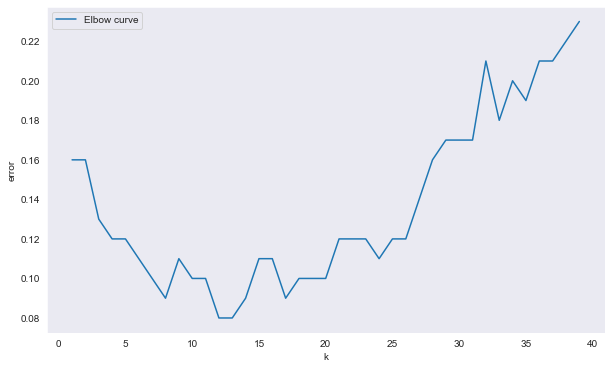

In [105]:
plt.figure(figsize=(10,6))
sns.lineplot(x=errorrate['k'],y=errorrate['error'],label='Elbow curve')

#### Assigning the no of n neighbours with low error(12) in below KNN

In [118]:
knn1=KNeighborsClassifier(n_neighbors=12,weights='distance')
knn1.fit(x_train,y_train)
ypredknn1=knn1.predict(x_test)
ypredknn1t=knn1.predict(x_train)

In [119]:
scores(y_train,ypredknn1t),scores(y_test,ypredknn1)

(         acuracy  precision  recall  f1score
 verylow      1.0        1.0     1.0      1.0
 high         1.0        1.0     1.0      1.0
 middle       1.0        1.0     1.0      1.0
 low          1.0        1.0     1.0      1.0,
           acuracy  precision    recall   f1score
 verylow  0.917355   1.000000  0.966667  0.983051
 high     0.917355   0.812500  1.000000  0.896552
 middle   0.917355   0.970588  0.891892  0.929577
 low      0.917355   1.000000  0.666667  0.800000)

##### Got best score.

#### plotting confusion matrix.

<AxesSubplot:>

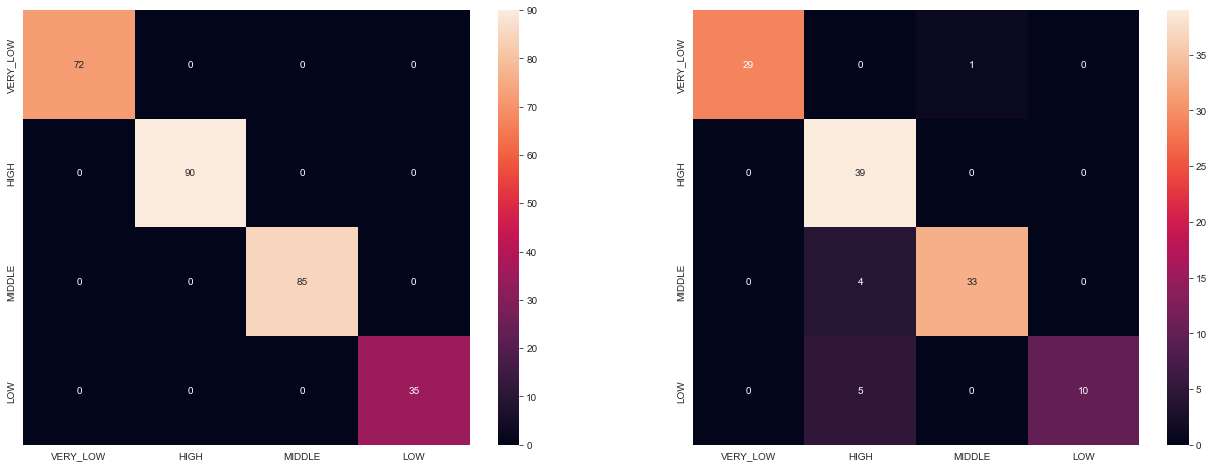

In [122]:
cfknn = confusion_matrix(y_test, ypredknn1)
cfknnt = confusion_matrix(y_train, ypredknn1t)
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
#plt.figure(figsize=(8,6))
sns.heatmap(ax=axes[0], data=cfknnt, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=cfknn, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

## support vector machines

### svm L1 penalty

In [123]:
from sklearn.svm import LinearSVC
lsvml1=LinearSVC(penalty='l1',dual=False)
lsvml1.fit(x_train,y_train)
ypredlsvml1=lsvml1.predict(x_test)
ypredlsvmtl1=lsvml1.predict(x_train)

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [124]:
lsvml1.score(x_train,y_train),lsvml1.score(x_test,y_test)

(0.8900709219858156, 0.8760330578512396)

In [125]:
scores(y_test,ypredlsvml1)

,acuracy,precision,recall,f1score
verylow,0.876033,0.967742,1.000000,0.983607
high,0.876033,0.735849,1.000000,0.847826
middle,0.876033,1.000000,0.675676,0.806452
low,0.876033,1.000000,0.800000,0.888889


In [126]:
scores(y_train,ypredlsvmtl1)

,acuracy,precision,recall,f1score
verylow,0.890071,0.946667,0.986111,0.965986
high,0.890071,0.775862,1.000000,0.873786
middle,0.890071,0.984375,0.741176,0.845638
low,0.890071,1.000000,0.771429,0.870968


<AxesSubplot:>

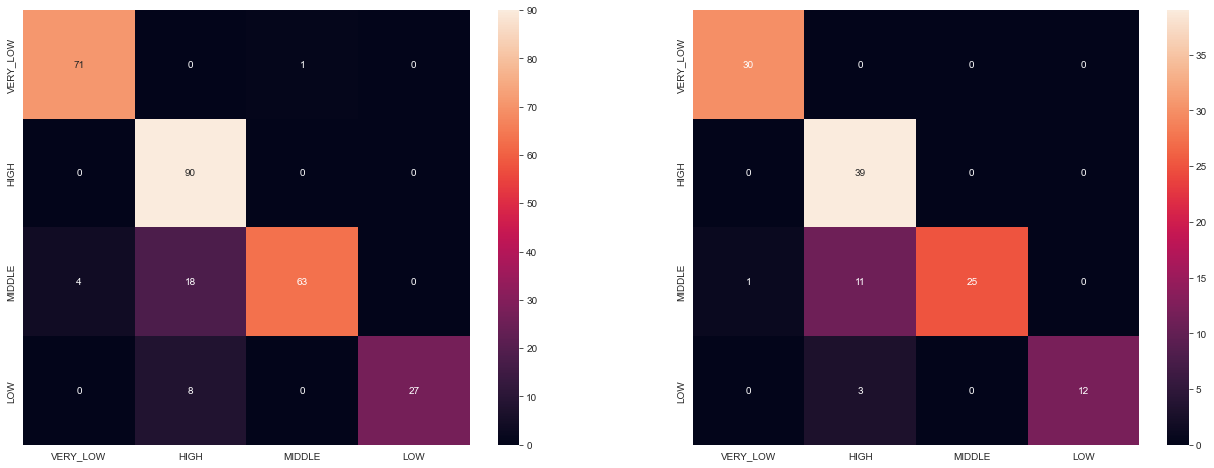

In [127]:
lsvml1cont=confusion_matrix(y_train,ypredlsvmtl1)
lsvml1con=confusion_matrix(y_test,ypredlsvml1)
fig,axes=plt.subplots(1,2, figsize=(22,8))
sns.heatmap(ax=axes[0], data=lsvml1cont, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=lsvml1con, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])


### svm L2 penalty

In [128]:
lsvml2=LinearSVC()
lsvml2.fit(x_train,y_train)
ypredlsvml2=lsvml2.predict(x_test)
ypredlsvml2t=lsvml2.predict(x_train)

In [129]:
accuracy_score(y_train,ypredlsvml2t),accuracy_score(y_test,ypredlsvml2)

(0.8475177304964538, 0.8429752066115702)

In [130]:
scores(y_train,ypredlsvml2t)

,acuracy,precision,recall,f1score
verylow,0.847518,0.898734,0.986111,0.940397
high,0.847518,0.729508,0.988889,0.839623
middle,0.847518,0.967213,0.694118,0.808219
low,0.847518,1.000000,0.571429,0.727273


In [131]:
scores(y_test,ypredlsvml2)

,acuracy,precision,recall,f1score
verylow,0.842975,0.937500,1.000000,0.967742
high,0.842975,0.696429,1.000000,0.821053
middle,0.842975,1.000000,0.648649,0.786885
low,0.842975,1.000000,0.600000,0.750000


<AxesSubplot:>

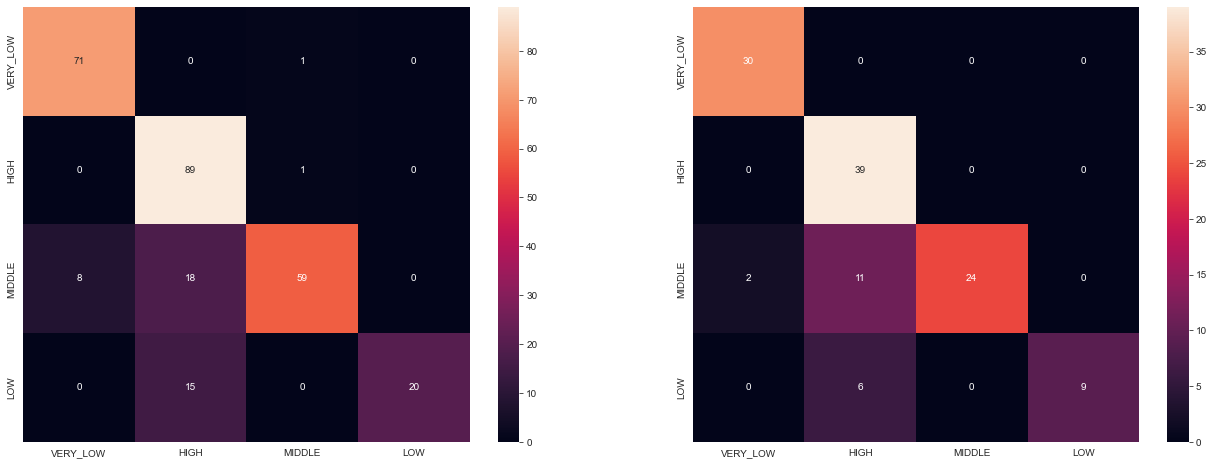

In [132]:
lsvml2cont=confusion_matrix(y_train,ypredlsvml2t)
lsvml2con=confusion_matrix(y_test,ypredlsvml2)
fig,axes=plt.subplots(1,2, figsize=(22,8))
sns.heatmap(ax=axes[0], data=lsvml2cont, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=lsvml2con, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

### svm with kernals

In [133]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [140]:
param_gr = {
    'C': [0.001, 1, 100],
    'gamma':[0.1,100,100],
    'kernel':['rbf','poly','sigmoid']}

In [141]:
svc=SVC()
grid=GridSearchCV(estimator=svc,param_grid=param_gr,scoring='f1',cv=3,verbose=1)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 1, 100], 'gamma': [0.1, 100, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1', verbose=1)

In [142]:
grid.best_params_

{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}

In [143]:
ypredgrsvm=grid.predict(x_test)
ypredgrsvmt=grid.predict(x_train)
accuracy_score(y_train,ypredgrsvmt),accuracy_score(y_test,ypredgrsvm)

(0.3191489361702128, 0.32231404958677684)

In [144]:
scores(y_train,ypredgrsvmt)

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,acuracy,precision,recall,f1score
verylow,0.319149,0.000000,0.0,0.000000
high,0.319149,0.319149,1.0,0.483871
middle,0.319149,0.000000,0.0,0.000000
low,0.319149,0.000000,0.0,0.000000


In [145]:
scores(y_test,ypredgrsvm)

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,acuracy,precision,recall,f1score
verylow,0.322314,0.000000,0.0,0.0000
high,0.322314,0.322314,1.0,0.4875
middle,0.322314,0.000000,0.0,0.0000
low,0.322314,0.000000,0.0,0.0000


### svc kernal method is not promising.

## Decision tree

###### with 'gini' criterion.

In [146]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42,criterion="gini")#criterion="entropy"
dtc.fit(x_train,y_train)
ypreddtc=dtc.predict(x_test)
ypreddtct=dtc.predict(x_train)

In [147]:
dtc.tree_.node_count,dtc.tree_.max_depth

(51, 9)

feature importance.

In [149]:
dtc.tree_.compute_feature_importances()

array([0.00813289, 0.01643467, 0.0222702 , 0.22154755, 0.73161469])

In [150]:
dtc.tree_.weighted_n_node_samples

array([282., 138.,  36.,  28.,   8.,   6.,   2.,   1.,   1., 102.,  87.,
         2.,  85.,   7.,   3.,   4.,  78.,  74.,  68.,  10.,   1.,   9.,
        58.,   6.,   4.,   2.,   4.,   2.,   2.,  15.,   6.,   5.,   1.,
         9., 144.,  83.,  72.,  71.,   3.,   1.,   2.,  68.,   1.,  11.,
        61.,  54.,   7.,   2.,   1.,   1.,   5.])

In [151]:
dtc.score(x_train,y_train),dtc.score(x_test,y_test)

(1.0, 0.9338842975206612)

In [152]:
scores(y_train,ypreddtct),scores(y_test,ypreddtc)

(         acuracy  precision  recall  f1score
 verylow      1.0        1.0     1.0      1.0
 high         1.0        1.0     1.0      1.0
 middle       1.0        1.0     1.0      1.0
 low          1.0        1.0     1.0      1.0,
           acuracy  precision    recall   f1score
 verylow  0.933884   1.000000  1.000000  1.000000
 high     0.933884   0.878049  0.923077  0.900000
 middle   0.933884   0.942857  0.891892  0.916667
 low      0.933884   0.933333  0.933333  0.933333)

<AxesSubplot:>

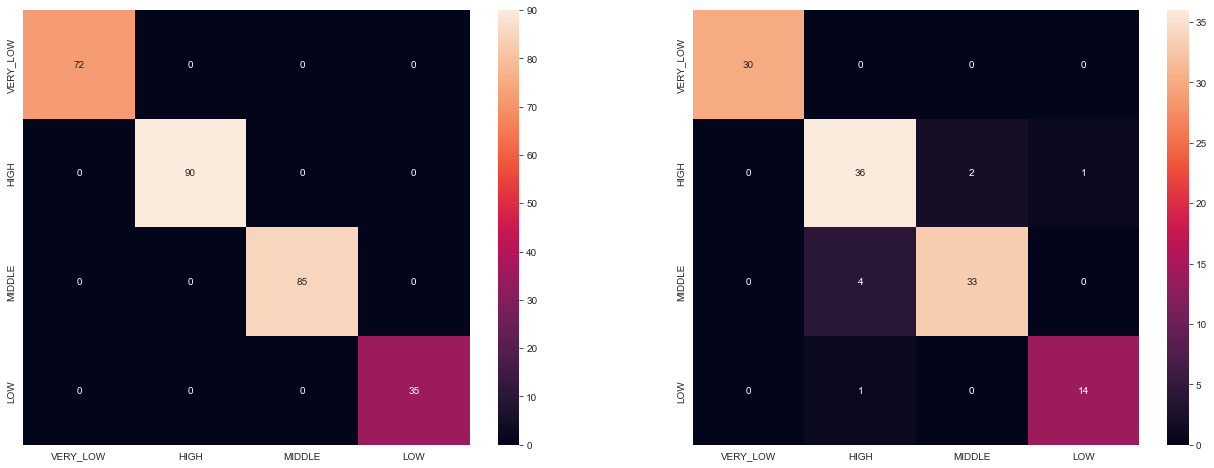

In [153]:
dtctcon=confusion_matrix(y_train,ypreddtct)
dtccon=confusion_matrix(y_test,ypreddtc)
fig,axes=plt.subplots(1,2,figsize=(22,8))
sns.heatmap(ax=axes[0], data=dtctcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=dtccon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

## Using GridSearchCV to find best parameters.

In [176]:
paramdtc={'criterion':['entropy','gini'],'max_depth':range(1,100),
          'max_features':range(1,6)
          }
griddtc=DecisionTreeClassifier(random_state=42) #can use criterion gini or entropy in gridsearchcv
griddtcmod=GridSearchCV(estimator=griddtc,param_grid=paramdtc,scoring='accuracy',cv=3,verbose=1)
griddtcmod.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 100),
                         'max_features': range(1, 6)},
             scoring='accuracy', verbose=1)

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 100),
                         'max_features': range(1, 6)},
             scoring='accuracy', verbose=1)

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 100),
                         'max_features': range(1, 6)},
             scoring='accuracy', verbose=1)

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 100),
                         'max_features': range(1, 6)},
             scoring='accuracy', verbose=1)

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 100),
                         'max_features': range(1, 6)},
             scoring='accuracy', verbose=1)

In [177]:
ypredgrdtct=griddtcmod.predict(x_train)
ypredgrdtc=griddtcmod.predict(x_test)

In [178]:
griddtcmod.best_estimator_,griddtcmod.best_score_

(DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=5,
                        random_state=42),
 0.900709219858156)

In [179]:
griddtcmod.best_estimator_.tree_.node_count,griddtcmod.best_estimator_.tree_.max_depth

(41, 6)

In [180]:
scores(y_train,ypredgrdtct),scores(y_test,ypredgrdtc)

(          acuracy  precision    recall   f1score
 verylow  0.989362   1.000000  1.000000  1.000000
 high     0.989362   0.967742  1.000000  0.983607
 middle   0.989362   1.000000  0.988235  0.994083
 low      0.989362   1.000000  0.942857  0.970588,
           acuracy  precision    recall   f1score
 verylow  0.933884   1.000000  1.000000  1.000000
 high     0.933884   0.918919  0.871795  0.894737
 middle   0.933884   0.871795  0.918919  0.894737
 low      0.933884   1.000000  1.000000  1.000000)

##### plotting matrix.

<AxesSubplot:>

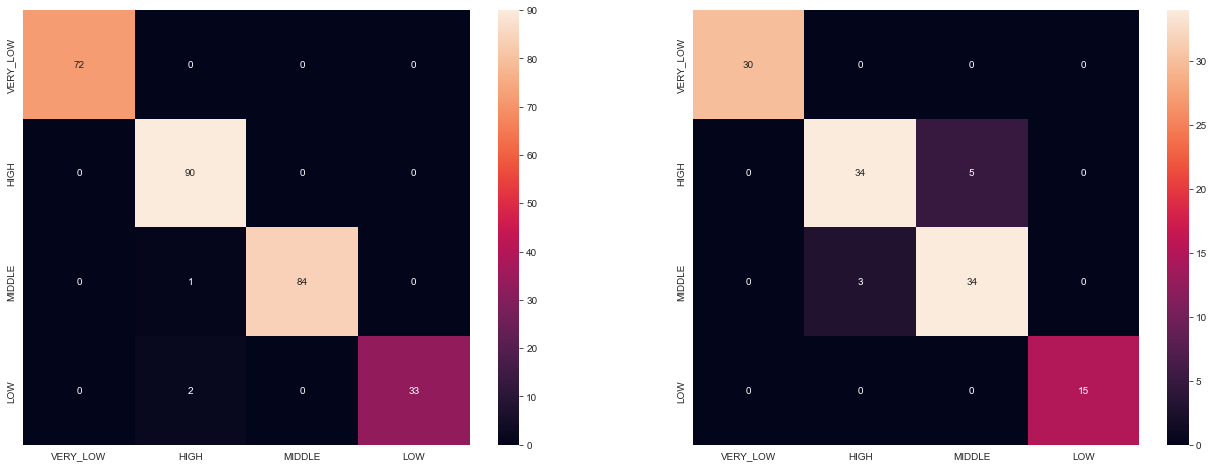

In [181]:
grdtctcon=confusion_matrix(y_train,ypredgrdtct)
grdtccon=confusion_matrix(y_test,ypredgrdtc)
fig,axes=plt.subplots(1,2,figsize=(22,8))
sns.heatmap(ax=axes[0], data=grdtctcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=grdtccon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

## Ensemble based models.

### Bagging

In [182]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(n_estimators=50)
bc.fit(x_train,y_train)
ypredbct=bc.predict(x_train)
ypredbc=bc.predict(x_test)

n estimator = 50 as told in course

In [183]:
scores(y_train,ypredbct),scores(y_test,ypredbc)

(          acuracy  precision    recall   f1score
 verylow  0.996454   1.000000  1.000000  1.000000
 high     0.996454   0.989011  1.000000  0.994475
 middle   0.996454   1.000000  1.000000  1.000000
 low      0.996454   1.000000  0.971429  0.985507,
           acuracy  precision    recall   f1score
 verylow  0.950413   1.000000  1.000000  1.000000
 high     0.950413   0.902439  0.948718  0.925000
 middle   0.950413   0.944444  0.918919  0.931507
 low      0.950413   1.000000  0.933333  0.965517)

In [184]:
parambc={'n_estimators':range(1,100)}
mod=BaggingClassifier(random_state=42)
gridbc=GridSearchCV(mod,parambc,cv=3,verbose=1)
gridbc.fit(x_train,y_train)
ypredgrbct=gridbc.predict(x_train)
ypredgrbc=gridbc.predict(x_test)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


In [185]:
accuracy_score(y_train,ypredgrbct),accuracy_score(y_test,ypredgrbc)

(1.0, 0.9586776859504132)

In [186]:
gridbc.best_params_,gridbc.best_score_

({'n_estimators': 32}, 0.9042553191489362)

In [187]:
scores(y_train,ypredgrbct),scores(y_test,ypredgrbc)

(         acuracy  precision  recall  f1score
 verylow      1.0        1.0     1.0      1.0
 high         1.0        1.0     1.0      1.0
 middle       1.0        1.0     1.0      1.0
 low          1.0        1.0     1.0      1.0,
           acuracy  precision    recall   f1score
 verylow  0.958678   1.000000  1.000000  1.000000
 high     0.958678   0.904762  0.974359  0.938272
 middle   0.958678   0.971429  0.918919  0.944444
 low      0.958678   1.000000  0.933333  0.965517)

#### find out of bag error to get eficient n_estimators

In [188]:
bago=BaggingClassifier(oob_score=True,random_state=42,n_jobs=1,warm_start=False,bootstrap=True)
oob_list=[]
for n_trees in range(1,100):
    bago.set_params(n_estimators=n_trees)
    bago.fit(x_train,y_train)
    oob_error=1 - bago.oob_score_
    oob_list.append(pd.Series({'n_trees':n_trees,'error':round(oob_error,4)}))
oob_err=pd.concat(oob_list,axis=1).T.set_index('n_trees')
oob_err

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Use

,error
n_trees,
1.0,0.5071
2.0,0.3440
3.0,0.2234
4.0,0.1773
5.0,0.1489
...,...
95.0,0.0887
96.0,0.0887
97.0,0.0851


In [189]:
oob_err.error.min()

0.0745

found that 50 is good.

In [190]:
oob_err[oob_err.error==0.0745]

,error
n_trees,
50.0,0.0745


<AxesSubplot:xlabel='n_trees'>

<Figure size 2016x504 with 0 Axes>

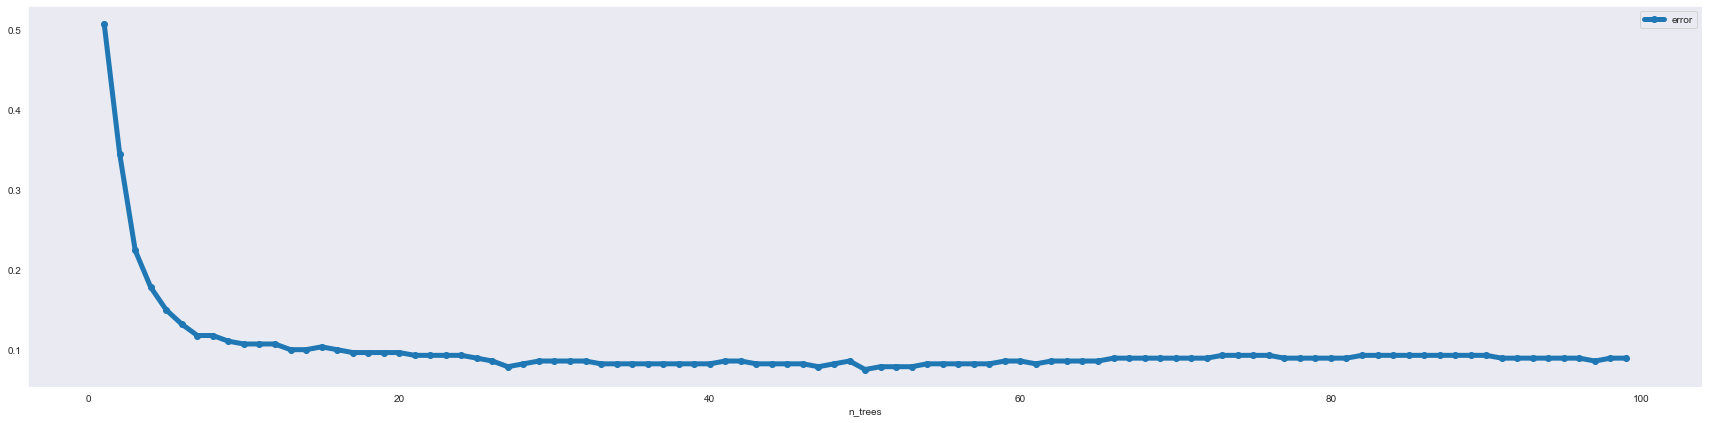

In [192]:
plt.figure(figsize=(28,7))
oob_err.plot(marker='o', figsize=(30, 7), linewidth=5)

### Random forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=49,random_state=2)

In [194]:
rf.fit(x_train,y_train)
ypredrft=rf.predict(x_train)
ypredrf=rf.predict(x_test)

In [195]:
rf.score(x_train,y_train),rf.score(x_test,y_test)

(1.0, 0.9752066115702479)

In [196]:
scores(y_train,ypredrft),scores(y_test,ypredrf)

(         acuracy  precision  recall  f1score
 verylow      1.0        1.0     1.0      1.0
 high         1.0        1.0     1.0      1.0
 middle       1.0        1.0     1.0      1.0
 low          1.0        1.0     1.0      1.0,
           acuracy  precision    recall   f1score
 verylow  0.975207   1.000000  1.000000  1.000000
 high     0.975207   0.928571  1.000000  0.962963
 middle   0.975207   1.000000  0.918919  0.957746
 low      0.975207   1.000000  1.000000  1.000000)

<AxesSubplot:>

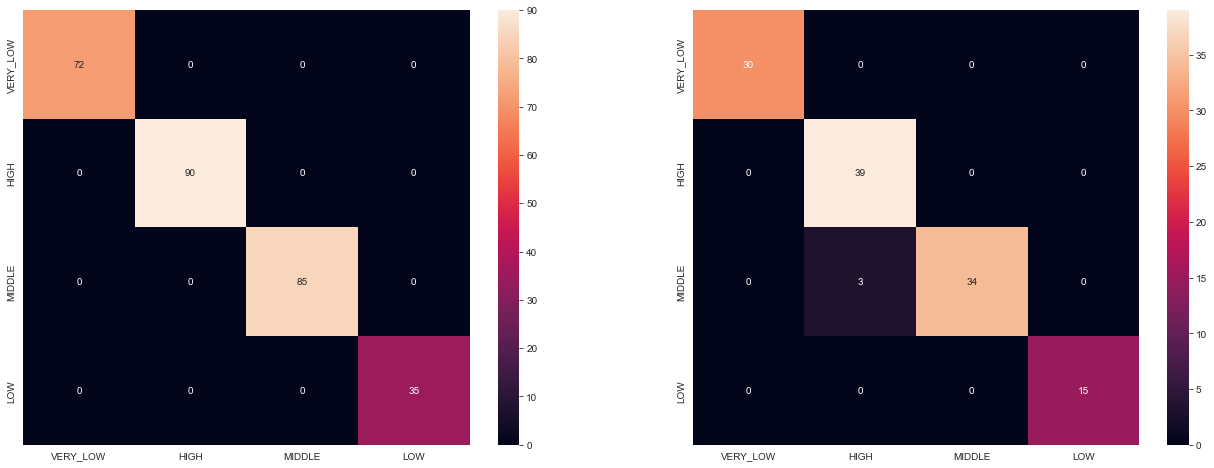

In [201]:
rftcon=confusion_matrix(y_train,ypredrft)
rfcon=confusion_matrix(y_test,ypredrf)
fig,axes=plt.subplots(1,2,figsize=(22,8))
sns.heatmap(ax=axes[0], data=rftcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=rfcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

In [202]:
param_gridrf = {'n_estimators': range(100),
             'max_depth' : range(15) ,
             'max_features':["auto", "sqrt", "log2"]}
model=RandomForestClassifier(random_state=2)

In [203]:
gridrf=GridSearchCV(estimator=model, param_grid=param_gridrf,scoring='accuracy',cv=3,return_train_score=True)
gridrf.fit(x_train, y_train)

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1026 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': range(0, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(0, 100)},
             return_train_score=True, scoring='accuracy')

In [204]:
ypredgrrft=gridrf.predict(x_train)
ypredgrrf=gridrf.predict(x_test)

In [205]:
gridrf.best_score_,gridrf.best_params_

(0.9148936170212766,
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 19})

In [206]:
scores(y_train,ypredgrrft),scores(y_test,ypredgrrf)

(          acuracy  precision    recall   f1score
 verylow  0.996454   1.000000  1.000000  1.000000
 high     0.996454   0.989011  1.000000  0.994475
 middle   0.996454   1.000000  0.988235  0.994083
 low      0.996454   1.000000  1.000000  1.000000,
           acuracy  precision    recall   f1score
 verylow  0.958678   1.000000  0.966667  0.983051
 high     0.958678   0.906977  1.000000  0.951220
 middle   0.958678   0.971429  0.918919  0.944444
 low      0.958678   1.000000  0.933333  0.965517)

<AxesSubplot:>

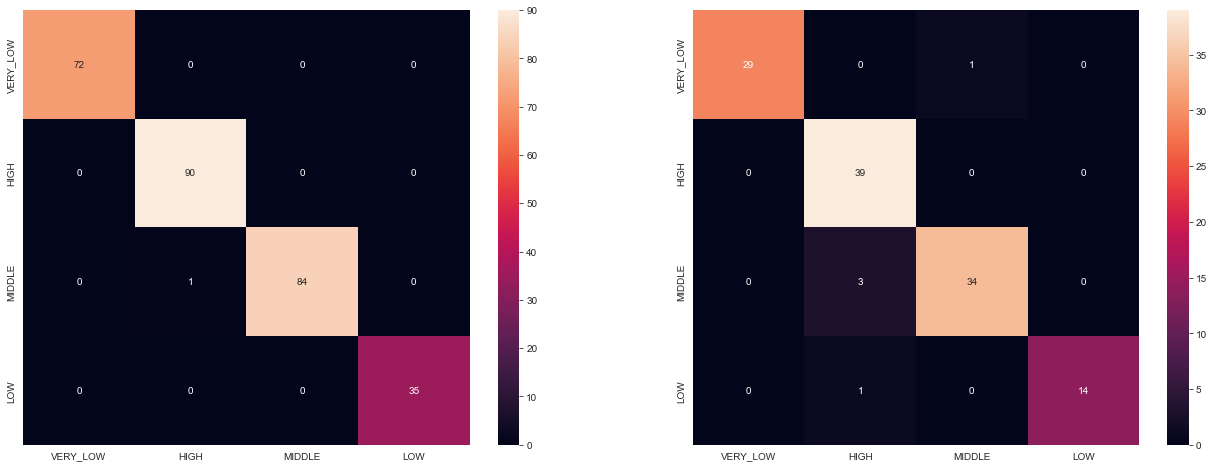

In [207]:
grdrftcon=confusion_matrix(y_train,ypredgrrft)
grdrfcon=confusion_matrix(y_test,ypredgrrf)
fig,axes=plt.subplots(1,2,figsize=(22,8))
sns.heatmap(ax=axes[0], data=grdrftcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])
sns.heatmap(ax=axes[1], data=grdrfcon, annot=True, xticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'],
            yticklabels=['VERY_LOW', 'HIGH', 'MIDDLE', 'LOW'])

### Extra tree classifier

In [211]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier(n_estimators=50,random_state=10)

In [212]:
ex.fit(x_train,y_train)
ypredex=ex.predict(x_test)
ypredext=ex.predict(x_train)

In [213]:
ex.score(x_train,y_train),ex.score(x_test,y_test)

(1.0, 0.9669421487603306)

##### we can do grid seachcv for this above also
##### and oob score method

In [214]:
oobex=ExtraTreesClassifier(oob_score=True,random_state=42,n_jobs=1,bootstrap=True)
oobex_list=[]
for n_trees in range(1,100):
    oobex.set_params(n_estimators=n_trees)
    oobex.fit(x_train,y_train)
    oobex_error=1 - oobex.oob_score_
    oobex_list.append(pd.Series({'n_trees':n_trees,'error':round(oobex_error,4)}))
oobex_err=pd.concat(oobex_list,axis=1).T.set_index('n_trees')
oobex_err

C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\vignesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\vig

,error
n_trees,
1.0,0.5496
2.0,0.3901
3.0,0.3085
4.0,0.2624
5.0,0.2163
...,...
95.0,0.0603
96.0,0.0603
97.0,0.0638


In [215]:
oobex_err.min()

error    0.0567
dtype: float64

In [216]:
topl=oobex_err[40:80]
oobex_err[oobex_err.error==0.0567]

,error
n_trees,
68.0,0.0567


<AxesSubplot:xlabel='n_trees'>

<Figure size 1440x720 with 0 Axes>

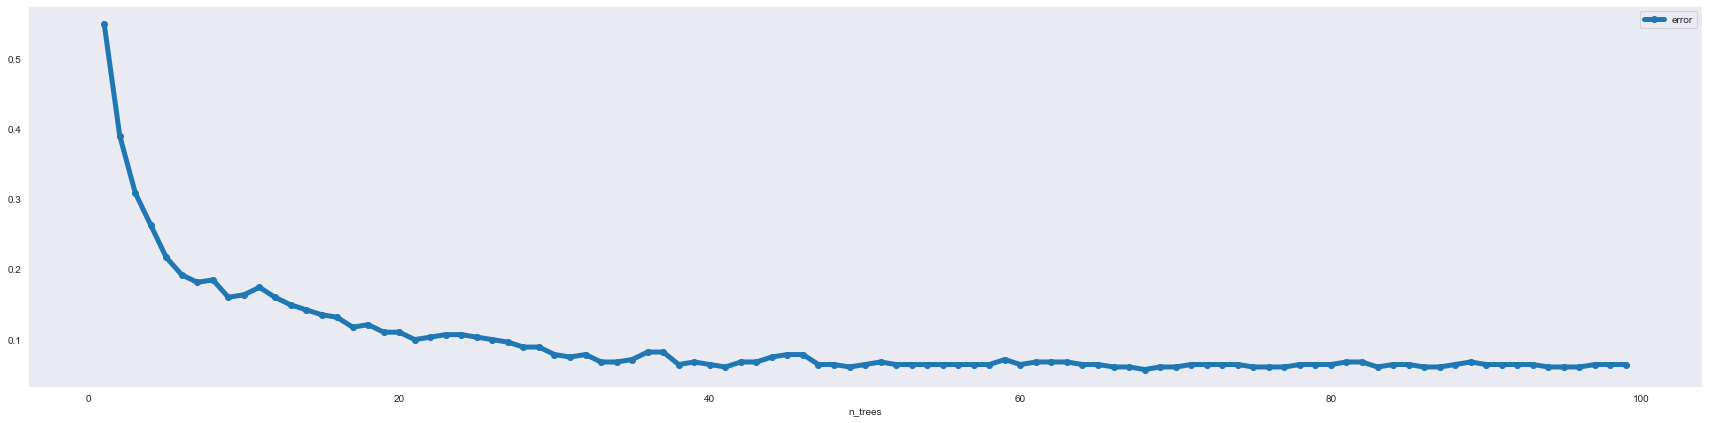

In [220]:
plt.figure(figsize=(20,10))
oobex_err.plot(marker='o', figsize=(30, 7), linewidth=5)

##### found that 68 is good.

In [221]:
ex1=ExtraTreesClassifier(n_estimators=68,random_state=10)
ex1.fit(x_train,y_train)
ypredex1=ex1.predict(x_test)
ypredext1=ex1.predict(x_train)
ex1.score(x_train,y_train),ex1.score(x_test,y_test)

(1.0, 0.9669421487603306)

In [223]:
scores(y_train,ypredext1),scores(y_test,ypredex1)

(         acuracy  precision  recall  f1score
 verylow      1.0        1.0     1.0      1.0
 high         1.0        1.0     1.0      1.0
 middle       1.0        1.0     1.0      1.0
 low          1.0        1.0     1.0      1.0,
           acuracy  precision    recall   f1score
 verylow  0.966942   1.000000  1.000000  1.000000
 high     0.966942   0.926829  0.974359  0.950000
 middle   0.966942   0.971429  0.918919  0.944444
 low      0.966942   1.000000  1.000000  1.000000)

# Best model is 'Random Forest' in terms of accuracy.

This model gives best accuracy score for the test dataset and generalize well for new data here it is test set.
It gives of

### 97%

of accuracy same as the AutoML. Hence Random Forset is the 'Model of the Analysis'.

# Summary

This Dataset is not having many more data points maybe that's why this notebook is simple to interpret when even reading about the describtion of the data.
So, that explains that Random forest came with Best score out of all the Models that are fitted.
From Logistic Regression, SVM, Decision tree to the ensemble models along with the AutoML used in this notebook good Fit is random Forest and the AutoML.

# Suggestions.

This Dataset is so simple and easy to interpret and do analysis i would suggest there is another student Performance Dataset available in Kaggle to use.
This data maybe worth doing analysis but with more number of data points and some more features. the features in this dataset is simple and not complex enough to and even the Knowledge level of a student is not solely depend on the 'performence' or 'number of time studing' and all. that's why more number of features can be helpful in further more Interpretation of the data.

# Thank you